- Exercici 1

Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

In [1]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import names
from barnum import gen_data
import random

Hem creat amb MySQL l'estructura d'una base de dades (codi disponible a l'arxiu 'S17_T02.sql'). Ens connectarem i insertarem valors generats aleatòriament des de python a les diferents taules.

In [2]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database='franquicia'
)

print(mydb) 

In [7]:
mycursor = mydb.cursor()

mycursor.execute("SHOW TABLES")

for x in mycursor:
    print(x)

('clients',)
('establiments',)
('productes',)
('treballadors',)


Generarem noms i cognoms falsos per crear entrades per la taula clients.

In [5]:
def names_surnames(number_of):
    
    nam_surnam = []
    for i in range(number_of):
        values = (names.get_first_name(), names.get_last_name())
        nam_surnam.append(values)
    return nam_surnam

In [5]:
insert_val_clients = "INSERT INTO clients (nom, cognom) VALUES (%s, %s)"
mycursor.executemany(insert_val_clients, names_surnames(20))

In [6]:
mycursor.execute("SELECT nom, cognom FROM clients")
result = mycursor.fetchall()
for x in result:
    print(x)

('Kenny', 'Hammond')
('Norma', 'Cobb')
('William', 'Lavis')
('Domenic', 'Gary')
('Joseph', 'Gage')
('Craig', 'Perez')
('Charles', 'Lau')
('Preston', 'Heflin')
('Alan', 'Ybanez')
('Elise', 'Queen')
('James', 'Ellis')
('Brian', 'Martin')
('Dona', 'Caban')
('Francis', 'Sullivan')
('Brian', 'Kirby')
('Timothy', 'Murphy')
('Steve', 'Floyd')
('Mary', 'Riess')
('John', 'Mccoy')
('Anastasia', 'Eastburn')


In [7]:
mydb.commit()

Ara afegirem els valors per als treballadors.

In [8]:
treballadors = []
for i in range(20):
    values = (names.get_first_name(), names.get_last_name(), random.randint(1000, 4000))
    treballadors.append(values)

treballadors

[('Sue', 'Irby', 1622),
 ('Melvin', 'King', 3702),
 ('Earl', 'Dahlstrom', 3361),
 ('Thomas', 'Lasley', 1478),
 ('Norberto', 'Rouse', 3787),
 ('Sonja', 'Miraflores', 2431),
 ('William', 'Vernon', 2895),
 ('Mary', 'Cesari', 1338),
 ('Pamala', 'Baker', 1339),
 ('Richard', 'Irwin', 3467),
 ('Patricia', 'Leroy', 2783),
 ('Perry', 'Hatmaker', 3816),
 ('Edna', 'Collins', 1297),
 ('David', 'Ross', 3851),
 ('Matthew', 'Rodriguez', 3724),
 ('Tamara', 'Madden', 2225),
 ('Maria', 'Williams', 1411),
 ('Kim', 'Mattos', 1259),
 ('Gladys', 'Mahler', 1529),
 ('Robert', 'Rose', 1442)]

In [9]:
insert_val_treball = "INSERT INTO treballadors (nom, cognom, salari) VALUES (%s, %s, %s)"
mycursor.executemany(insert_val_treball, treballadors)

In [11]:
mycursor.execute("SELECT nom, cognom, salari FROM treballadors")
result = mycursor.fetchall()
for x in result:
    print(x)

('Sue', 'Irby', 1622)
('Melvin', 'King', 3702)
('Earl', 'Dahlstrom', 3361)
('Thomas', 'Lasley', 1478)
('Norberto', 'Rouse', 3787)
('Sonja', 'Miraflores', 2431)
('William', 'Vernon', 2895)
('Mary', 'Cesari', 1338)
('Pamala', 'Baker', 1339)
('Richard', 'Irwin', 3467)
('Patricia', 'Leroy', 2783)
('Perry', 'Hatmaker', 3816)
('Edna', 'Collins', 1297)
('David', 'Ross', 3851)
('Matthew', 'Rodriguez', 3724)
('Tamara', 'Madden', 2225)
('Maria', 'Williams', 1411)
('Kim', 'Mattos', 1259)
('Gladys', 'Mahler', 1529)
('Robert', 'Rose', 1442)


In [12]:
mydb.commit()

Continuarem amb la taula d'establiments.

In [11]:
establiments = []
for i in range(20):
    values = (gen_data.create_company_name(biz_type="Generic"), 
              gen_data.create_city_state_zip()[1], random.randint(50, 500))
    establiments.append(values)

establiments

[('Solutions Studio Inc', 'Grandin', 259),
 ('Net Omega West Industries', 'Rochester', 216),
 ('Hardware Limited', 'Oklahoma City', 137),
 ('Network Incorporated', 'Shuqualak', 152),
 ('Power Pacific Corporation', 'Valdosta', 276),
 ('Omega Research Agency', 'Sparks', 206),
 ('Federated Architecture Co', 'Wisconsin Rapids', 433),
 ('Interactive Construction Limited', 'Johnson', 379),
 ('Graphics Hill Systems Industries', 'Napavine', 213),
 ('Telecom Internet Alpha International', 'Camp Creek', 179),
 ('Application Universal International', 'Mineral Point', 235),
 ('Speed Corporation', 'Cincinnati', 373),
 ('Data North Incorporated', 'Bullhead City', 444),
 ('Consulting Limited', 'Marion', 428),
 ('Provider Vision Electronics Limited', 'Rockport', 311),
 ('Federated Graphics Source Agency', 'Oceano', 332),
 ('General LLC', 'Buchanan', 369),
 ('Hardware Group', 'China Village', 341),
 ('Medicine Organization', 'Allentown', 50),
 ('Vision Solutions Design Agency', 'Drybranch', 415)]

In [12]:
insert_val_establiment = "INSERT INTO establiments (nom, loc, superf) VALUES (%s, %s, %s)"
mycursor.executemany(insert_val_establiment, establiments)

In [13]:
mycursor.execute("SELECT nom, loc, superf FROM establiments")
result = mycursor.fetchall()
for x in result:
    print(x)

('Solutions Studio Inc', 'Grandin', 259)
('Net Omega West Industries', 'Rochester', 216)
('Hardware Limited', 'Oklahoma City', 137)
('Network Incorporated', 'Shuqualak', 152)
('Power Pacific Corporation', 'Valdosta', 276)
('Omega Research Agency', 'Sparks', 206)
('Federated Architecture Co', 'Wisconsin Rapids', 433)
('Interactive Construction Limited', 'Johnson', 379)
('Graphics Hill Systems Industries', 'Napavine', 213)
('Telecom Internet Alpha International', 'Camp Creek', 179)
('Application Universal International', 'Mineral Point', 235)
('Speed Corporation', 'Cincinnati', 373)
('Data North Incorporated', 'Bullhead City', 444)
('Consulting Limited', 'Marion', 428)
('Provider Vision Electronics Limited', 'Rockport', 311)
('Federated Graphics Source Agency', 'Oceano', 332)
('General LLC', 'Buchanan', 369)
('Hardware Group', 'China Village', 341)
('Medicine Organization', 'Allentown', 50)
('Vision Solutions Design Agency', 'Drybranch', 415)


In [14]:
mydb.commit()

Finalment, els productes.

In [15]:
product_types = ["cereal", "corn flakes", "pound cake", "almond cake", 
                 "napoleon", "meat", "beef", "pork", "veal", "lamb"]

productes = []
for i in range(10):
    values = (product_types[i], random.randint(1, 10))
    productes.append(values)

In [16]:
insert_val_products = "INSERT INTO productes (tipus, preu) VALUES (%s, %s)"
mycursor.executemany(insert_val_products, productes)

In [17]:
mycursor.execute("SELECT tipus, preu FROM productes")
result = mycursor.fetchall()
for x in result:
    print(x)

('cereal', 6)
('corn flakes', 9)
('pound cake', 1)
('almond cake', 1)
('napoleon', 7)
('meat', 8)
('beef', 5)
('pork', 6)
('veal', 5)
('lamb', 9)


In [18]:
mydb.commit()

- Exercici 2

Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

In [3]:
treballadors = pd.read_sql_query("SELECT * FROM treballadors", mydb)
treballadors

,id_treballador,nom,cognom,salari
0,1,Sue,Irby,1622
1,2,Melvin,King,3702
2,3,Earl,Dahlstrom,3361
3,4,Thomas,Lasley,1478
4,5,Norberto,Rouse,3787
5,6,Sonja,Miraflores,2431
6,7,William,Vernon,2895
7,8,Mary,Cesari,1338
8,9,Pamala,Baker,1339
9,10,Richard,Irwin,3467


In [4]:
establiments = pd.read_sql_query("SELECT * FROM establiments", mydb)
establiments

,id_establiment,nom,loc,superf
0,21,Solutions Studio Inc,Grandin,259
1,22,Net Omega West Industries,Rochester,216
2,23,Hardware Limited,Oklahoma City,137
3,24,Network Incorporated,Shuqualak,152
4,25,Power Pacific Corporation,Valdosta,276
5,26,Omega Research Agency,Sparks,206
6,27,Federated Architecture Co,Wisconsin Rapids,433
7,28,Interactive Construction Limited,Johnson,379
8,29,Graphics Hill Systems Industries,Napavine,213
9,30,Telecom Internet Alpha International,Camp Creek,179


In [5]:
#només els productes que valen més de 6 euros
pd.read_sql_query("SELECT * FROM productes WHERE preu>6", mydb)

,id_producte,tipus,preu
0,12,corn flakes,9
1,15,napoleon,7
2,16,meat,8
3,20,lamb,9


In [6]:
#clients els noms dels quals comencin per "Do"
pd.read_sql_query("SELECT * FROM clients WHERE nom LIKE 'Do%'", mydb)

,id_clients,nom,cognom
0,84,Domenic,Gary
1,93,Dona,Caban


- Exercici 3

Genera algun gràfic que resumeixi les dades. 

Les dades, com és d'esperar, presenten una distribució aleatòria.

<AxesSubplot:xlabel='superf', ylabel='Count'>

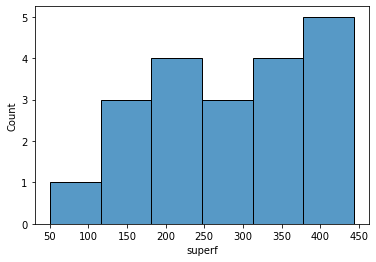

In [19]:
sns.histplot(establiments.superf)

La majoria d'establiments es troben entre 375 i 440 metres quadrats.

<AxesSubplot:xlabel='salari', ylabel='Count'>

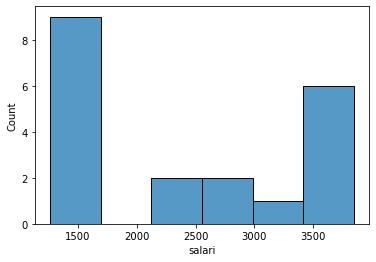

In [20]:
sns.histplot(treballadors.salari)

La majoria dels treballadors tenen un salari de 1500 euros, molts pocs tenen un salari entre els 2000 i els 3500 euros, bastants superen aquesta última xifra.